In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading Data set
heart_disease_data =pd.read_csv('processed.cleveland.data', names=['age','sex', 'cp','trestbps','chol','fbs','restecg','thalach','exang', 'oldpeak', 'slope','ca','thal','num'])

In [3]:
heart_disease_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


In [4]:
'''
Checking for data
'''
print(heart_disease_data.shape)
print(heart_disease_data.info())
print(heart_disease_data.index)
print('\033[1m','\nFirst three data:','\033[0m') # '\033[1m' genertates bold string in terminal output
print(heart_disease_data.head(3))
print('\033[1m','\nLast three data:','\033[0m')
print(heart_disease_data.tail(3))
print('\033[1m','\nDescribing Data:','\033[0m')
print(heart_disease_data.describe())

(303, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  num       303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB
None
RangeIndex(start=0, stop=303, step=1)
 
First three data: 
    age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.

In [5]:
# Numeric columns
numeric_columns = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'num']

# Categorical columns
cat_columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal', 'ca']

print("Numeric columns:", numeric_columns)
print("Categorical columns:", cat_columns)

Numeric columns: ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'num']
Categorical columns: ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal', 'ca']


In [6]:
# Converting categorical column into object type for analysis
heart_disease_data[cat_columns] = heart_disease_data[cat_columns].astype(object)

In [7]:
heart_disease_data.dtypes

age         float64
sex          object
cp           object
trestbps    float64
chol        float64
fbs          object
restecg      object
thalach     float64
exang        object
oldpeak     float64
slope        object
ca           object
thal         object
num           int64
dtype: object

### Data Cleaning

In [8]:
# Cleaning missing value
def clean_missing_value(data):
      # Check for missing values
    missing_values = data.isnull().sum()
    print("Missing Value",missing_values)

    # Remove rows or columns with more than 50% missing values
    rows_to_drop = missing_values[missing_values > 0.5 * len(data)].index
    print("rows to drop",rows_to_drop) # no rows has 50% miswsing values
    data.drop(columns=rows_to_drop, inplace=True)  # Drop columns with more than 50% missing values

    # For columns with less than 50% missing values
    # Fill missing numerical values with mean
    numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
    data[numerical_cols] = data[numerical_cols].fillna(heart_disease_data[numerical_cols].mean())
    
    # For categorical columns, Fill missing values with the mode (most frequent value)
    categorical_cols = data.select_dtypes(include=['object']).columns
    print(categorical_cols)
    data[categorical_cols] = data[categorical_cols].fillna(heart_disease_data[categorical_cols].mode().iloc[0])
    
    # Convert back to object data type
    data[categorical_cols] = data[categorical_cols].astype('object')
    
    return data

In [9]:
# Handling duplicates
def handle_duplicates(data):
    # Check for duplicates
    duplicates = data.duplicated().sum()
    print('\033[1m','\nNo of Duplicate Data:','\033[0m', duplicates)  
    
    # Drop duplicates
    data = data.drop_duplicates()
    print("data info")
    print(data.info())
    return data

In [10]:
'''
The dataset has ?, therefore, we  need to clean this value
Replace ? by null
'''
def replace_question_mark(data):
    data.replace("?", pd.NA, inplace=True)
    return data

In [11]:
'''
Main function to clean data set.
'''
def clean_data(data):
    
    #Replace ? by null
    data = replace_question_mark(data)
    
    # Check for missing values
    data = clean_missing_value(data)
    
    # Handle duplicates
    data = handle_duplicates(data)
    return data
refine_heart_disease_data = clean_data(heart_disease_data)

Missing Value age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
dtype: int64
rows to drop Index([], dtype='object')
Index(['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'], dtype='object')
 
No of Duplicate Data:  0
data info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    object 
 2   cp        303 non-null    object 
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    object 
 6   restecg   303 non-null    object 
 7   thalach   303 non-null    float64
 8   exang     303 non-null    object 
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    object 
 1

## 2.1 Exploring 10 features

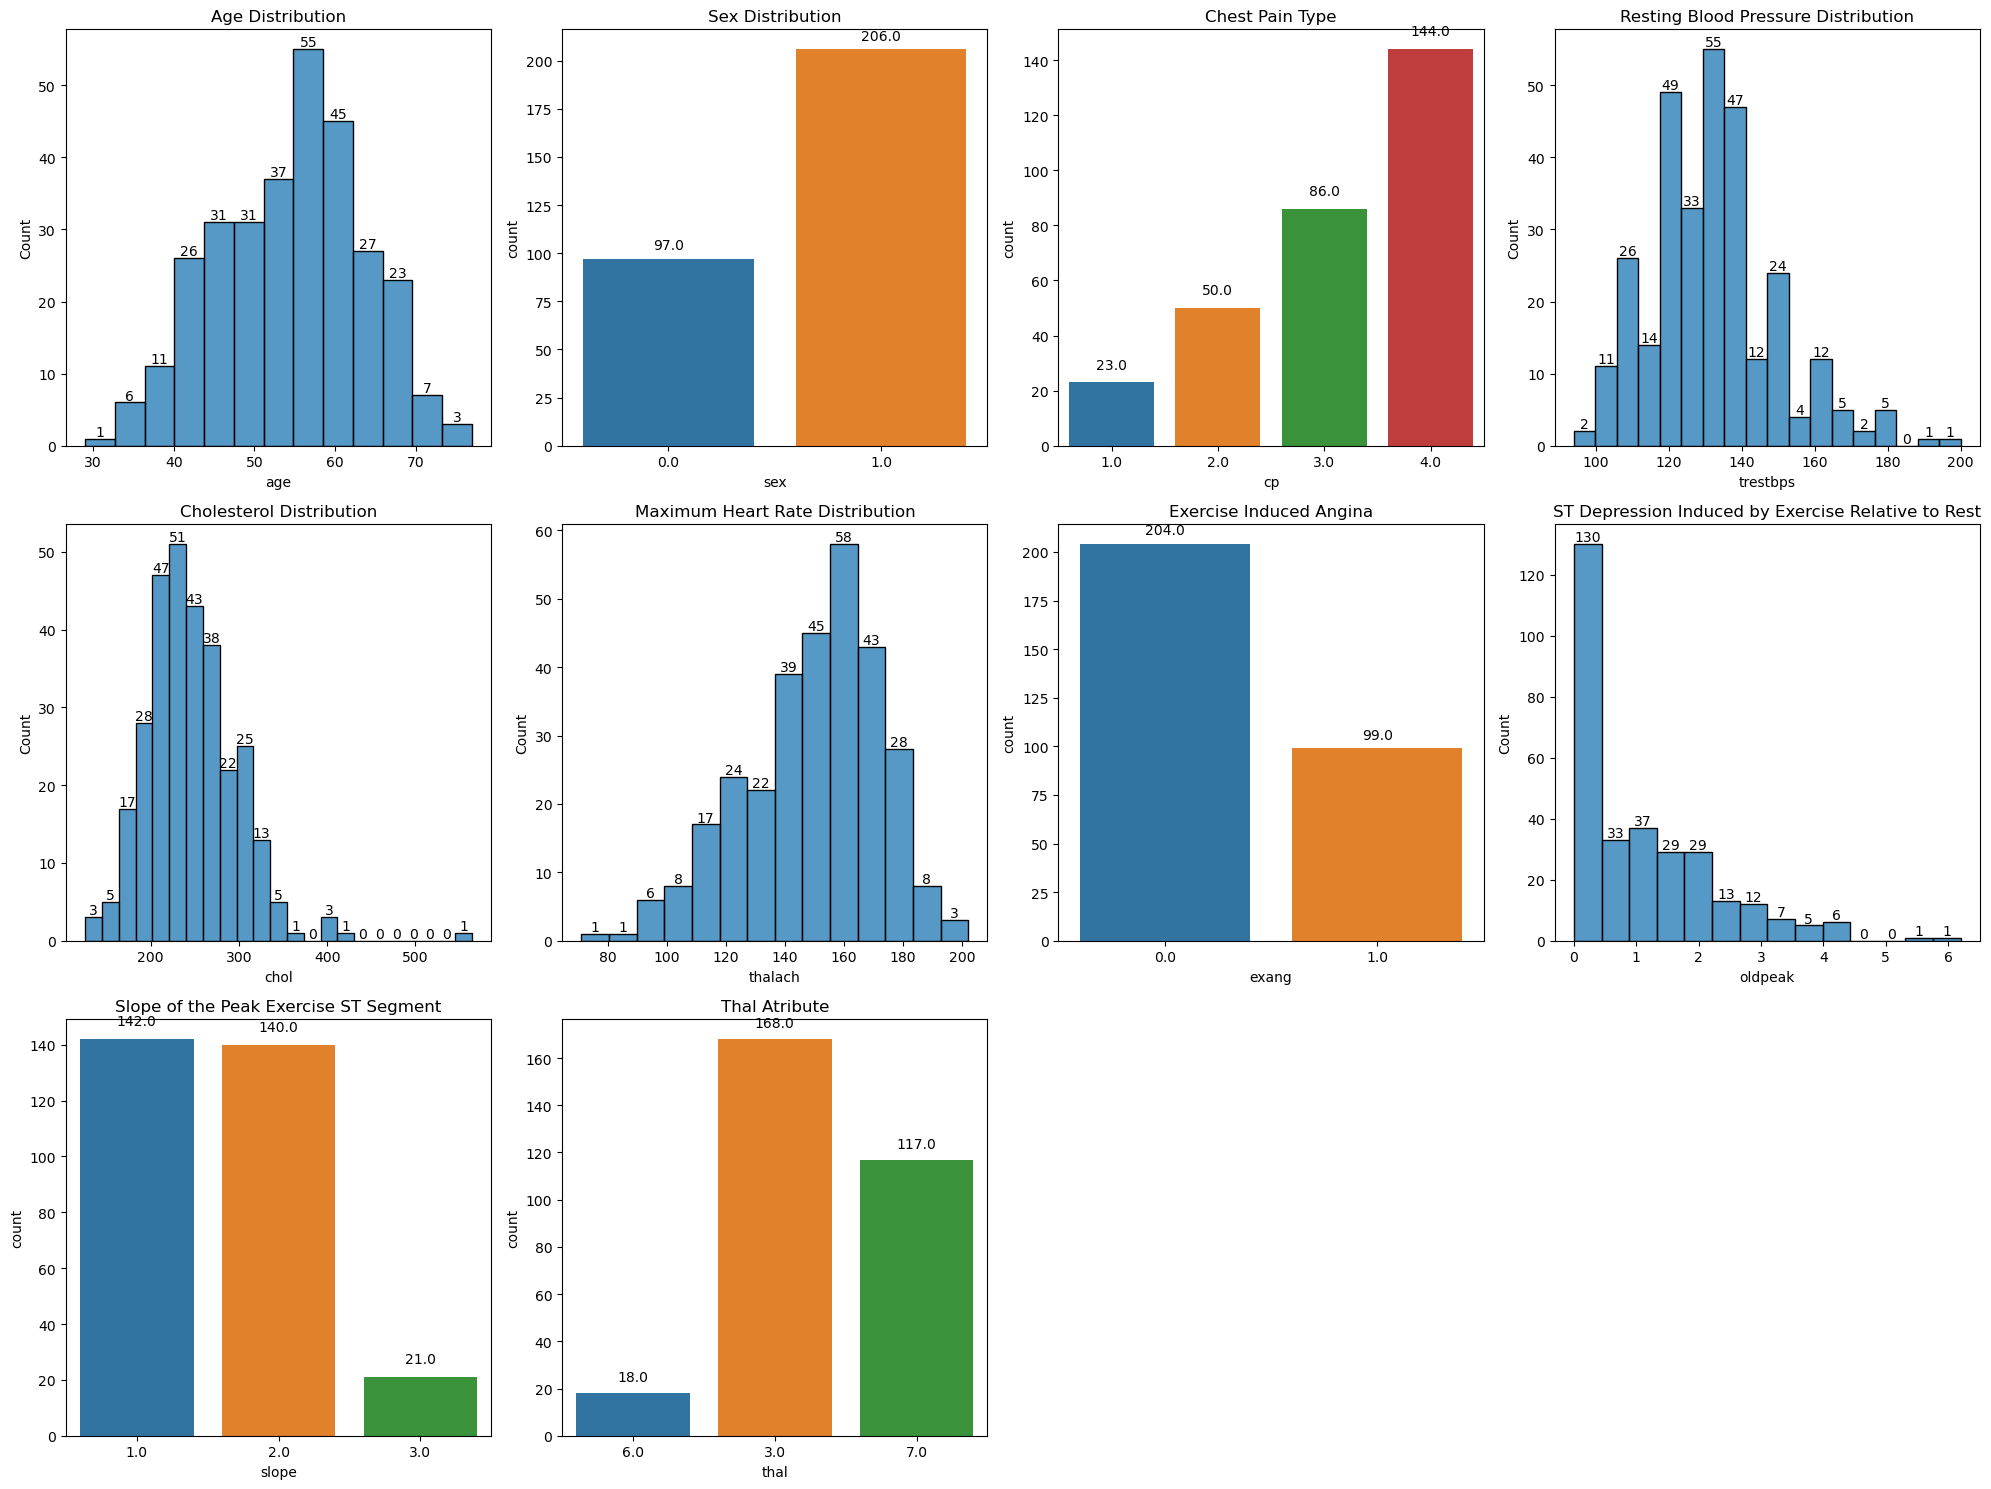

Descriptive Statistics:
              age    trestbps        chol     thalach     oldpeak
count  303.000000  303.000000  303.000000  303.000000  303.000000
mean    54.438944  131.689769  246.693069  149.607261    1.039604
std      9.038662   17.599748   51.776918   22.875003    1.161075
min     29.000000   94.000000  126.000000   71.000000    0.000000
25%     48.000000  120.000000  211.000000  133.500000    0.000000
50%     56.000000  130.000000  241.000000  153.000000    0.800000
75%     61.000000  140.000000  275.000000  166.000000    1.600000
max     77.000000  200.000000  564.000000  202.000000    6.200000


In [12]:

# 10 chosen attributes 
selected_attributes = ['age', 'sex', 'cp', 'trestbps', 'chol', 'thalach', 'exang', 'oldpeak', 'slope', 'thal']

# Descriptive statistics
desc_stats = refine_heart_disease_data[selected_attributes].describe()

# Visualizations
fig, axes = plt.subplots(3, 4, figsize=(20, 15))

# Flatten axes array for easier indexing
axes = axes.flatten()

# Titles for each graph
graph_titles = ['Age Distribution', 'Sex Distribution', 'Chest Pain Type', 'Resting Blood Pressure Distribution', 
                'Cholesterol Distribution', 'Maximum Heart Rate Distribution', 'Exercise Induced Angina', 
                'ST Depression Induced by Exercise Relative to Rest', 'Slope of the Peak Exercise ST Segment', 
                'Thal Atribute']

for i, col in enumerate(selected_attributes):
    if refine_heart_disease_data[col].dtype == 'object':
        # Bar plot for categorical variables
        sns.countplot(data=refine_heart_disease_data, x=col, ax=axes[i])
        # Display count of each category on the bar plot
        for patch in axes[i].patches:
            # Get the height of the bar
            height = patch.get_height()
            # Display count above each bar
            axes[i].text(patch.get_x() + patch.get_width() / 2, height + 5, f'{height}', ha='center')
    else:
        # Histogram for numeric variables
        sns.histplot(data=refine_heart_disease_data, x=col, ax=axes[i])
          # Add counts in each bin
        for p in axes[i].patches:
            axes[i].annotate(format(p.get_height(), '.0f'), 
                              (p.get_x() + p.get_width() / 2., p.get_height()), 
                              ha = 'center', va = 'center', 
                              xytext = (0, 5), 
                              textcoords = 'offset points')

    axes[i].set_title(graph_titles[i])

# Hide empty subplots
for j in range(len(selected_attributes), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


print("Descriptive Statistics:")
print(desc_stats)


### 2.2 Exploring columns realtionship

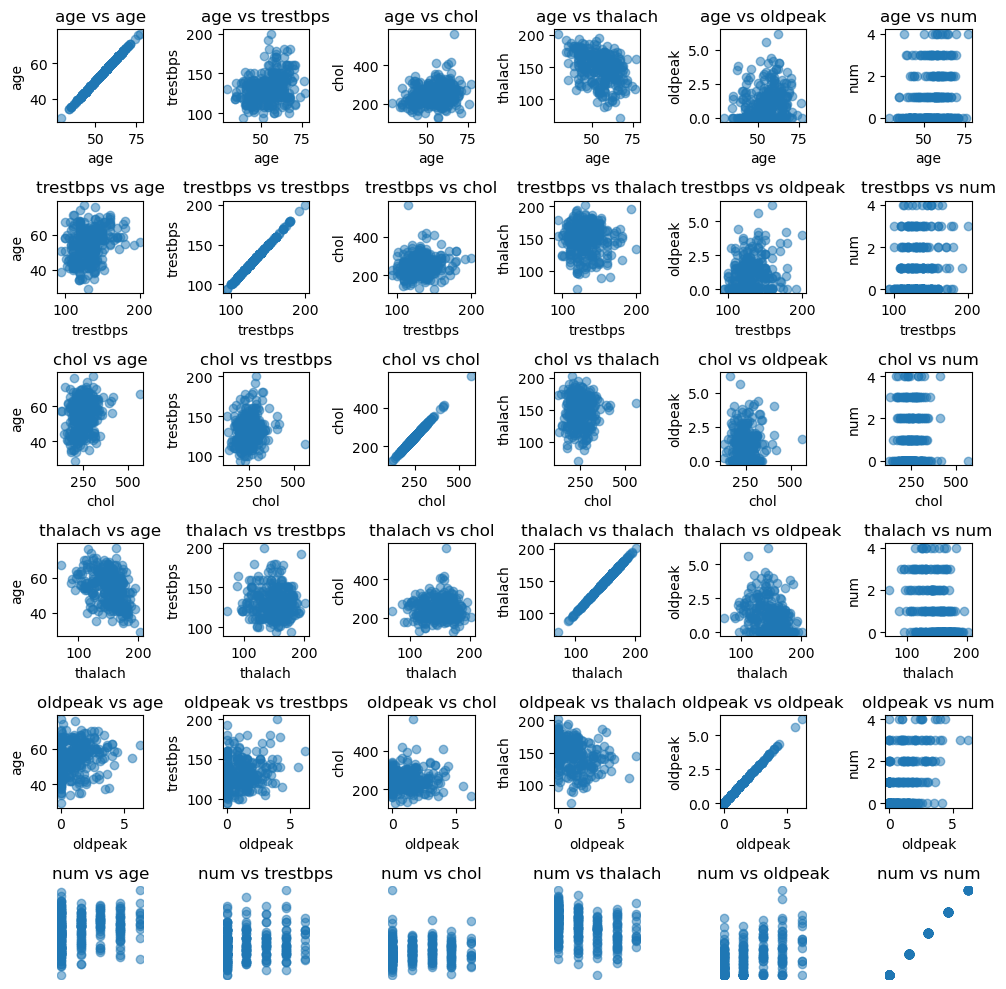

In [13]:
# Select numeric columns for scatter plots
numeric_columns = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'num']

# Create scatter plots for each pair of numeric columns
fig, axes = plt.subplots(6, 6, figsize=(10, 10))
# fig.subplots_adjust(hspace=0.5, wspace=0.5)

# Flatten axes array for easier indexing
axes = axes.flatten()

for i, col1 in enumerate(numeric_columns):
    for j, col2 in enumerate(numeric_columns):
        # Plot scatter plot for each pair of numeric columns
        axes[i * len(numeric_columns) + j].scatter(refine_heart_disease_data[col1], refine_heart_disease_data[col2], alpha=0.5)
        axes[i * len(numeric_columns) + j].set_xlabel(col1)
        axes[i * len(numeric_columns) + j].set_ylabel(col2)
        axes[i * len(numeric_columns) + j].set_title(f"{col1} vs {col2}")

# Hide empty subplots
for k in range(len(numeric_columns) * len(numeric_columns)):
    if k >= len(numeric_columns) * len(numeric_columns) - len(numeric_columns):
        axes[k].axis('off')

plt.tight_layout()
plt.show()

Exploring relationship between age and sex:



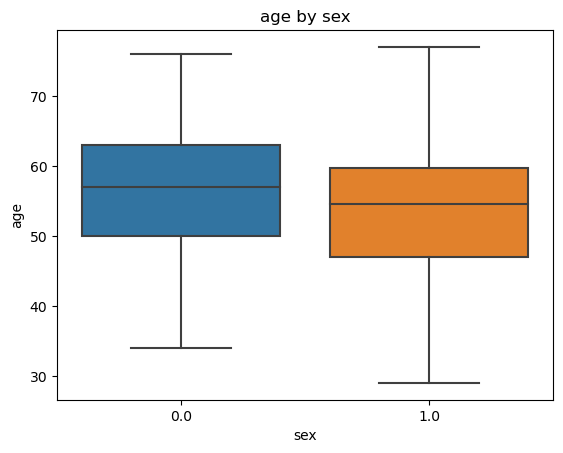

Descriptive statistics for age grouped by sex:

     count       mean       std   min   25%   50%    75%   max
sex                                                           
0.0   97.0  55.721649  9.370546  34.0  50.0  57.0  63.00  76.0
1.0  206.0  53.834951  8.836838  29.0  47.0  54.5  59.75  77.0
Exploring relationship between trestbps and cp:



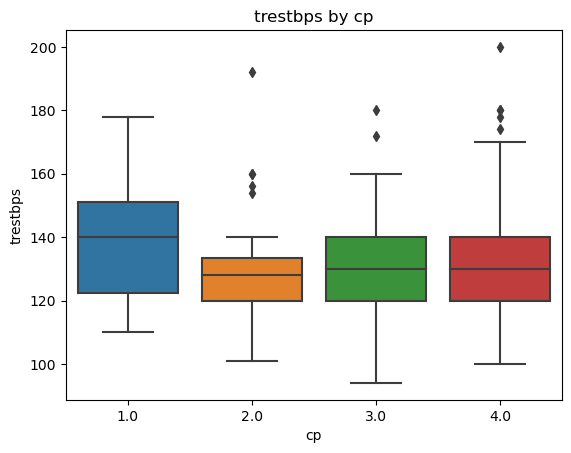

Descriptive statistics for trestbps grouped by cp:

     count        mean        std    min    25%    50%    75%    max
cp                                                                  
1.0   23.0  140.869565  19.573415  110.0  122.5  140.0  151.0  178.0
2.0   50.0  128.400000  15.837182  101.0  120.0  128.0  133.5  192.0
3.0   86.0  130.290698  16.548585   94.0  120.0  130.0  140.0  180.0
4.0  144.0  132.201389  18.102884  100.0  120.0  130.0  140.0  200.0
Exploring relationship between chol and exang:



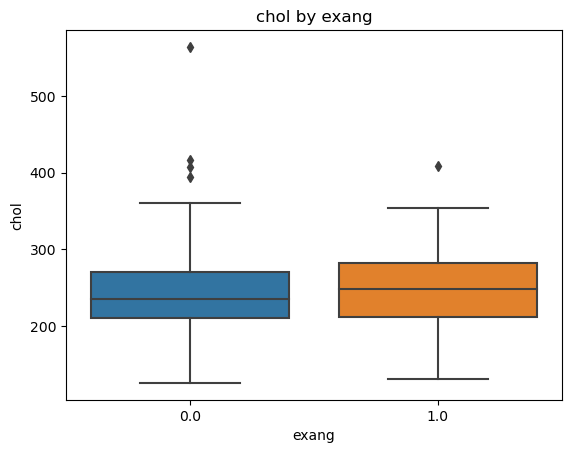

Descriptive statistics for chol grouped by exang:

       count        mean        std    min    25%    50%    75%    max
exang                                                                 
0.0    204.0  244.485294  52.841102  126.0  211.0  236.0  271.0  564.0
1.0     99.0  251.242424  49.462435  131.0  212.5  249.0  282.5  409.0
Exploring relationship between thalach and slope:



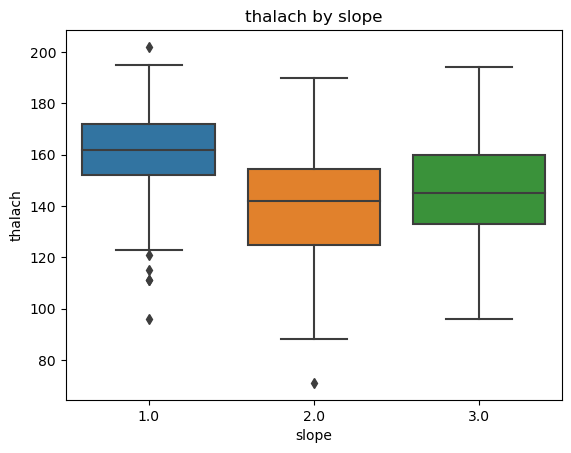

Descriptive statistics for thalach grouped by slope:

       count        mean        std   min     25%    50%     75%    max
slope                                                                  
1.0    142.0  160.471831  17.748317  96.0  152.25  162.0  172.00  202.0
2.0    140.0  139.292857  22.226919  71.0  124.75  142.0  154.25  190.0
3.0     21.0  144.904762  25.317790  96.0  133.00  145.0  160.00  194.0
Exploring relationship between oldpeak and num:



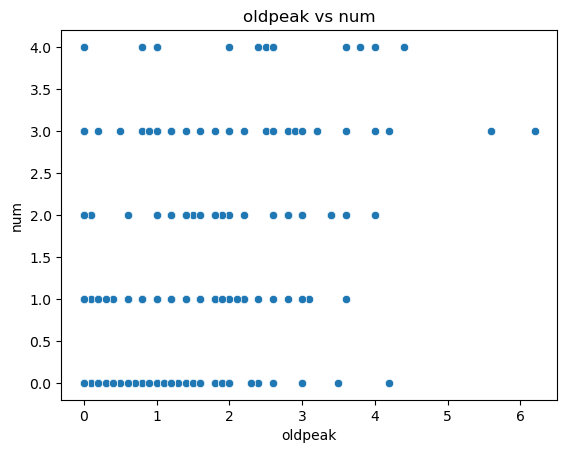

Descriptive statistics for oldpeak:
count    303.000000
mean       1.039604
std        1.161075
min        0.000000
25%        0.000000
50%        0.800000
75%        1.600000
max        6.200000
Name: oldpeak, dtype: float64

Descriptive statistics for num:
count    303.000000
mean       0.937294
std        1.228536
min        0.000000
25%        0.000000
50%        0.000000
75%        2.000000
max        4.000000
Name: num, dtype: float64
Pearson correlation coefficient between oldpeak and num: 0.504091973033799
Exploring relationship between sex and num:



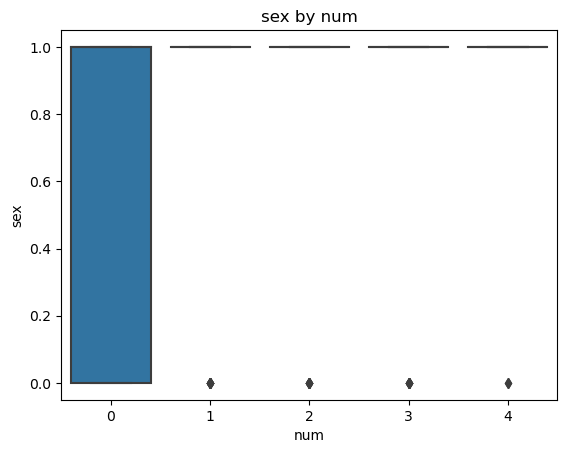

Descriptive statistics for sex grouped by num:

     count  unique  top  freq
num                          
0    164.0     2.0  1.0  92.0
1     55.0     2.0  1.0  46.0
2     36.0     2.0  1.0  29.0
3     35.0     2.0  1.0  28.0
4     13.0     2.0  1.0  11.0
Exploring relationship between cp and num:



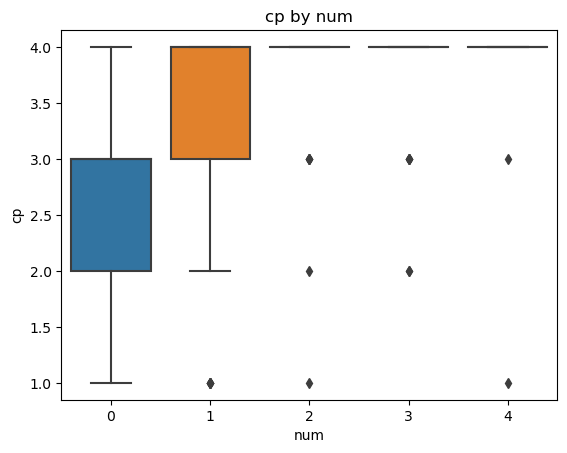

Descriptive statistics for cp grouped by num:

     count  unique  top  freq
num                          
0    164.0     4.0  3.0  68.0
1     55.0     4.0  4.0  35.0
2     36.0     4.0  4.0  30.0
3     35.0     3.0  4.0  29.0
4     13.0     3.0  4.0  11.0
Exploring relationship between exang and num:



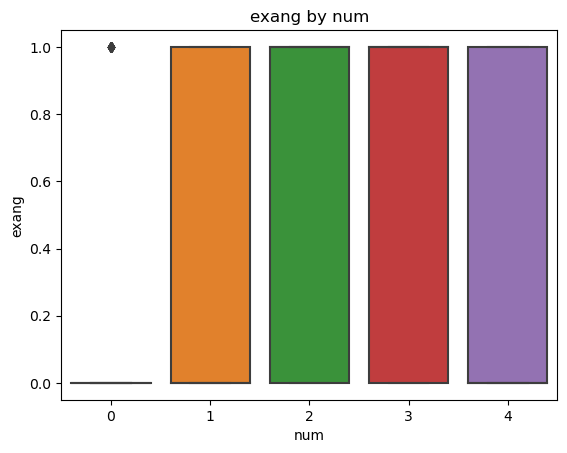

Descriptive statistics for exang grouped by num:

     count  unique  top   freq
num                           
0    164.0     2.0  0.0  141.0
1     55.0     2.0  0.0   30.0
2     36.0     2.0  1.0   22.0
3     35.0     2.0  1.0   23.0
4     13.0     2.0  0.0    7.0
Exploring relationship between slope and num:



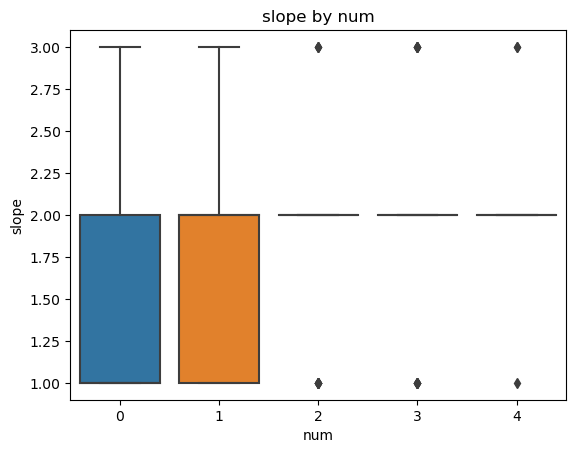

Descriptive statistics for slope grouped by num:

     count  unique  top   freq
num                           
0    164.0     3.0  1.0  106.0
1     55.0     3.0  2.0   31.0
2     36.0     3.0  2.0   26.0
3     35.0     3.0  2.0   24.0
4     13.0     3.0  2.0   10.0
Exploring relationship between thal and num:



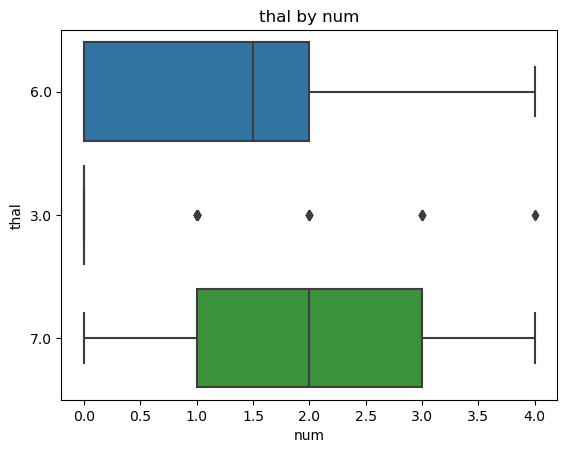

Descriptive statistics for thal grouped by num:

    count unique  top freq
num                       
0     164      3  3.0  130
1      55      3  7.0   30
2      36      3  7.0   22
3      35      3  7.0   28
4      13      3  7.0    9


In [14]:
#10 pairs of columns for exploration
selected_pairs = [('age', 'sex'), ('trestbps', 'cp'), ('chol', 'exang'), ('thalach', 'slope'), ('oldpeak', 'num'), 
                  ('sex', 'num'), ('cp', 'num'), ('exang', 'num'), ('slope', 'num'), ('thal', 'num')]

# Visualizations and descriptive statistics
for pair in selected_pairs:
    col1, col2 = pair
    print(f"Exploring relationship between {col1} and {col2}:\n")
    
    if refine_heart_disease_data[col1].dtype == 'object' and refine_heart_disease_data[col2].dtype == 'object':
        # If both columns are categorical
        contingency_table = pd.crosstab(refine_heart_disease_data[col1], refine_heart_disease_data[col2])
        contingency_table.plot(kind='bar', stacked=True)
        plt.title(f"{col1} vs {col2}")
        plt.xlabel(col1)
        plt.ylabel("Frequency")
        plt.show()
        print(f"Contingency table for {col1} and {col2}:\n{contingency_table}\n")
    elif refine_heart_disease_data[col1].dtype != 'object' and refine_heart_disease_data[col2].dtype != 'object':
        # If both columns are numeric
        sns.scatterplot(data=refine_heart_disease_data, x=col1, y=col2)
        plt.title(f"{col1} vs {col2}")
        plt.xlabel(col1)
        plt.ylabel(col2)
        plt.show()
        
        # Calculate descriptive statistics
        print(f"Descriptive statistics for {col1}:")
        print(refine_heart_disease_data[col1].describe())
        print(f"\nDescriptive statistics for {col2}:")
        print(refine_heart_disease_data[col2].describe())
        
        # Calculate correlation coefficient
        correlation_coefficient = refine_heart_disease_data[[col1, col2]].corr().iloc[0, 1]
        print(f"Pearson correlation coefficient between {col1} and {col2}: {correlation_coefficient}")
    else:
        # One categorical and one numeric column, use box plot
        sns.boxplot(data=refine_heart_disease_data, x=col2, y=col1)
        plt.title(f"{col1} by {col2}")
        plt.xlabel(col2)
        plt.ylabel(col1)
        plt.show()

         # Print count values for categorical column
        print(f"Descriptive statistics for {col1} grouped by {col2}:\n")
        print(refine_heart_disease_data.groupby(col2)[col1].describe())

### 2.3 Studying relationship

In [15]:
#Is there a significant difference in resting blood pressure (trestbps) among patients with different types of chest pain (cp)

'''
From above
Descriptive statistics for trestbps grouped by cp:

     count        mean        std    min    25%    50%    75%    max
cp                                                                  
1.0   23.0  140.869565  19.573415  110.0  122.5  140.0  151.0  178.0
2.0   50.0  128.400000  15.837182  101.0  120.0  128.0  133.5  192.0
3.0   86.0  130.290698  16.548585   94.0  120.0  130.0  140.0  180.0
4.0  144.0  132.201389  18.102884  100.0  120.0  130.0  140.0  200.0
'''


'\nFrom above\nDescriptive statistics for trestbps grouped by cp:\n\n     count        mean        std    min    25%    50%    75%    max\ncp                                                                  \n1.0   23.0  140.869565  19.573415  110.0  122.5  140.0  151.0  178.0\n2.0   50.0  128.400000  15.837182  101.0  120.0  128.0  133.5  192.0\n3.0   86.0  130.290698  16.548585   94.0  120.0  130.0  140.0  180.0\n4.0  144.0  132.201389  18.102884  100.0  120.0  130.0  140.0  200.0\n'

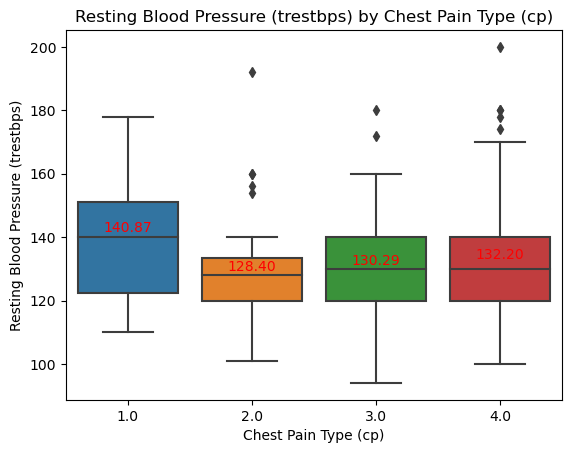

In [16]:
sns.boxplot(data=refine_heart_disease_data, x='cp', y='trestbps')
plt.title("Resting Blood Pressure (trestbps) by Chest Pain Type (cp)")
plt.xlabel("Chest Pain Type (cp)")
plt.ylabel("Resting Blood Pressure (trestbps)")

# Calculate mean values for each chest pain type
means = refine_heart_disease_data.groupby('cp')['trestbps'].mean().values

# Annotate the boxplot with mean values
for i, mean in enumerate(means, start=1):
    plt.text(i-1, mean, f'{mean:.2f}', ha='center', va='bottom', color='red', fontsize=10)

plt.show()


### 3.1 Data Preparation

In [17]:
'''
Separating data into attributes and label.
heart_disease_data_only - contains data
heart_disease_label_only- contains label
'''
heart_disease_data_only = refine_heart_disease_data.drop('num', axis =1)
heart_disease_label_only = refine_heart_disease_data['num']

In [18]:
heart_disease_data_only.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    object 
 2   cp        303 non-null    object 
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    object 
 6   restecg   303 non-null    object 
 7   thalach   303 non-null    float64
 8   exang     303 non-null    object 
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    object 
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
dtypes: float64(5), object(8)
memory usage: 30.9+ KB


In [19]:
heart_disease_label_only.info()

<class 'pandas.core.series.Series'>
RangeIndex: 303 entries, 0 to 302
Series name: num
Non-Null Count  Dtype
--------------  -----
303 non-null    int64
dtypes: int64(1)
memory usage: 2.5 KB


In [20]:
'''
Preprocessing:
For numerical: StandardScalar()
For categorical: OneHotEncoding
'''
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_features = heart_disease_data_only.select_dtypes(include=['float64']).columns
categorical_features = heart_disease_data_only.select_dtypes(include=['object']).columns

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(drop='first'))  # Using drop='first' to avoid multicollinearity
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Appling preprocessing to features
heart_disease_data_only_scaled = preprocessor.fit_transform(heart_disease_data_only)

print("Preprocessed data shape:", heart_disease_data_only_scaled.shape)
print("First row of preprocessed data:", heart_disease_data_only_scaled[0])


Preprocessed data shape: (303, 20)
First row of preprocessed data: [ 0.94872647  0.75752504 -0.2649003   0.01719733  1.08733806  1.
  0.          0.          0.          1.          0.          1.
  0.          0.          1.          0.          0.          0.
  1.          0.        ]


In [21]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns

X = heart_disease_data_only # Features
y = heart_disease_label_only  # Labels

# Range of 'N' values to try
n_values = list(range(1, 21))  # Trying 'N' from 1 to 20

# List to store mean cross-validation scores for each 'N' value
mean_cv_scores = []

# Perform cross-validation for each 'N' value
for n in n_values:
    # Create KNN model with 'n' neighbors
    knn_model = KNeighborsClassifier(n_neighbors=n)
    
    # Perform 10-fold cross-validation
    cv_scores = cross_val_score(knn_model, X, y, cv=10)
    
    # Calculate mean cross-validation score
    mean_cv_score = cv_scores.mean()
    
    # Append mean cross-validation score to the list
    mean_cv_scores.append(mean_cv_score)

# Finding the optimal 'N' value with the highest mean cross-validation score
optimal_n = n_values[mean_cv_scores.index(max(mean_cv_scores))]

print(f"The optimal number of neighbors (N) is: {optimal_n}")


The optimal number of neighbors (N) is: 18


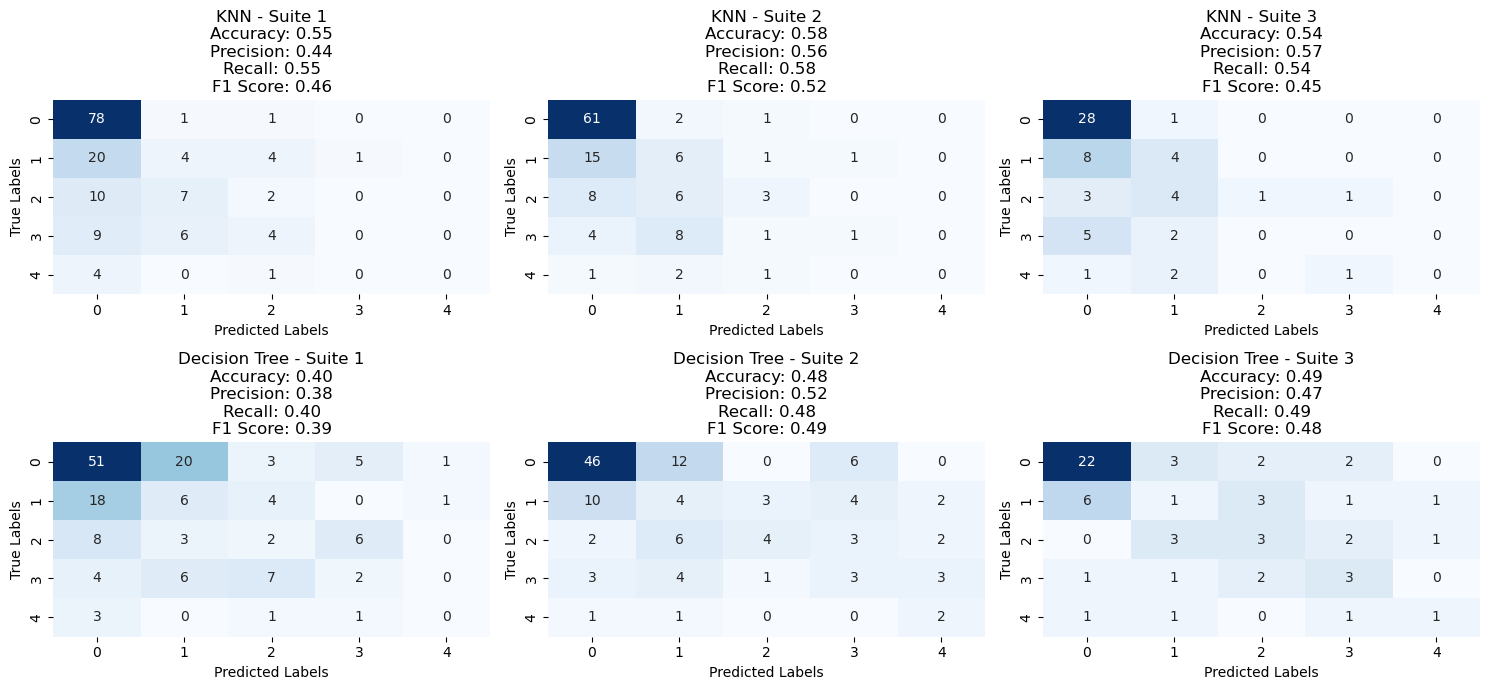

In [22]:
'''
Function to split dataset
'''
def split_data(X, y, suite_ratio):
    # Splitting the data into training and test sets for different ratios
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=(1 - suite_ratio), random_state=42)
    return X_train, X_test, y_train, y_test


'''
Function to train dataset
'''
def train_evaluate_model(model, X_train, X_test, y_train, y_test):
    # Training the model
    model.fit(X_train, y_train)
    
    # Evaluating performance
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Calculating evaluation metrics
    train_conf_matrix = confusion_matrix(y_train, y_train_pred)
    test_conf_matrix = confusion_matrix(y_test, y_test_pred)
    
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    
    train_precision = precision_score(y_train, y_train_pred, average='weighted',zero_division=1)
    test_precision = precision_score(y_test, y_test_pred, average='weighted',zero_division=1)
    
    train_recall = recall_score(y_train, y_train_pred, average='weighted')
    test_recall = recall_score(y_test, y_test_pred, average='weighted')
    
    train_f1 = f1_score(y_train, y_train_pred, average='weighted')
    test_f1 = f1_score(y_test, y_test_pred, average='weighted')
    
    return train_conf_matrix, test_conf_matrix, train_accuracy, test_accuracy, \
           train_precision, test_precision, train_recall, test_recall, train_f1, test_f1

'''
Function to plot confusion matrix
'''
def plot_confusion_matrix(ax, conf_matrix, title, acc, precision, recall, f1):
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, ax=ax)
    ax.set_xlabel('Predicted Labels')
    ax.set_ylabel('True Labels')
    ax.set_title(f"{title}\nAccuracy: {acc:.2f}\nPrecision: {precision:.2f}\nRecall: {recall:.2f}\nF1 Score: {f1:.2f}")


X = heart_disease_data_only_scaled  # Features
y = heart_disease_label_only  # Labels

# Split ratios for training and testing
'''
Suite1: 50% for training and 50% for testing
Suite2: 60% for training and 40% for testing
Suite3: 80% for training and 20% for testing
'''
suite_ratios = [0.5, 0.6, 0.8]

# Models
models = {
    'KNN': KNeighborsClassifier(n_neighbors=optimal_n),  
    'Decision Tree': DecisionTreeClassifier(max_depth=5)
}

# Initialize subplots
fig, axs = plt.subplots(len(models), len(suite_ratios), figsize=(15, 7))

# Loop over each model
for i, (model_name, model) in enumerate(models.items()):
    # Loop over each suite ratio
    for j, suite_ratio in enumerate(suite_ratios):
        # Split data
        X_train, X_test, y_train, y_test = split_data(X, y, suite_ratio)
        
        # Train and evaluate the model
        train_conf_matrix, test_conf_matrix, train_accuracy, test_accuracy, \
        train_precision, test_precision, train_recall, test_recall, train_f1, test_f1 = \
            train_evaluate_model(model, X_train, X_test, y_train, y_test)
        
        # Plot confusion matrix
        ax = axs[i][j]
        plot_confusion_matrix(ax, test_conf_matrix, title=f"{model_name} - Suite {j+1}",
                              acc=test_accuracy, precision=test_precision, recall=test_recall, f1=test_f1)

plt.tight_layout()
plt.show()


In [23]:
'''
Since KNN shows uniform consistency in accuracy, KNN is the recommended model.
'''

'\nSince KNN shows uniform consistency in accuracy, KNN is the recommended model.\n'